# <span style="color:blue">EVAC Workshop 3: Multi-objective evolution</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>


Before participating in this practical make sure that you have watched the the pre-workshop materials:
- Lecture 3
- Code walkthrough 5


# Colab Packages Install

In [247]:
!pip install deap
!pip install seaborn

zsh:1: command not found: pip
zsh:1: command not found: pip


# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu + Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives (see two equations below) that we want to minimize. It can have an arbirtarly number *N* of input variables *xi*, which take values within the range -5 and 5.

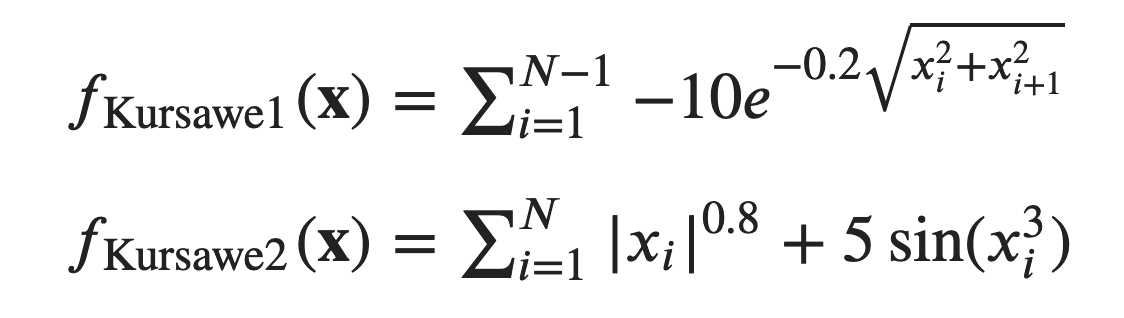

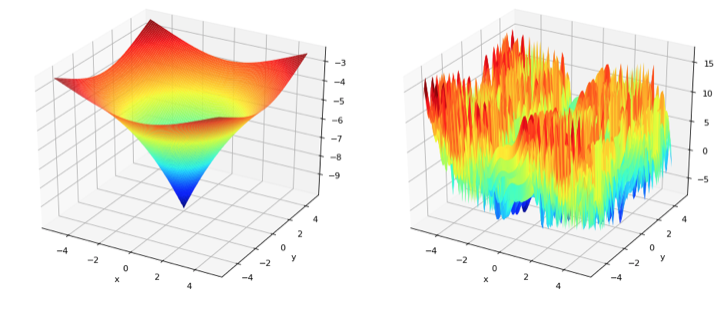

There are built-in benchmark problems in DEAP. You import them like this:

In [248]:
from deap import benchmarks

The kursawe function can be called like this:

In [249]:
exampleInputs = [-5, 2, 5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Task 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [250]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import random
import numpy

In [251]:
creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attr_item", random.uniform, -5.0, 5.0)
toolbox.register(
    "individual", tools.initRepeat, creator.Individual, toolbox.attr_item, 3
)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [252]:
# The evaluation function
def kur_obj(ind):
    return benchmarks.kursawe(ind)


toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", kur_obj)

In [253]:
"""These components are useful for tracking and analyzing the progress of the evolutionary algorithm. The logbook can be used to record various data throughout the evolutionary process, such as the generation number and the best individual found. The statistics object allows for the calculation and storage of statistical measures (e.g., mean, standard deviation, min, max) of the population's fitness values at each generation. This information can be used to analyze the performance and convergence of the algorithm."""

# Creates a logbook object, which is a data structure used to store and organize data, typically for logging the progress of an evolutionary algorithm.
logbook = tools.Logbook()

# Creates a statistics object to collect statistics on the population during the evolution process.
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

# Registers the mean function from NumPy to calculate the average fitness of the population.
stats.register("avg", numpy.mean)

# Registers the std function from NumPy to calculate the standard deviation of the fitness values in the population.
stats.register("std", numpy.std)

# Registers the min function from NumPy to calculate the minimum fitness value in the population.
stats.register("min", numpy.min)

# Registers the max function from NumPy to calculate the maximum fitness value in the population.
stats.register("max", numpy.max)

In [254]:
"""This block of code sets up the initial population for the evolutionary algorithm by creating a list of individuals and evaluating their fitness values based on the problem definition. Then, it assigns these fitness values to the individuals' fitness attributes for further processing during the evolutionary algorithm."""

# Creates a population of 100 individuals using the toolbox.population function that was previously registered. This function creates a list of individuals, where each individual is created using the toolbox.individual function.
pop = toolbox.population(n=100)

# Evaluates the fitness of each individual in the population using the toolbox.evaluate function that was registered earlier. This line uses the map function to apply the toolbox.evaluate function to each individual in the population pop, and then converts the result into a list.
fitnesses = list(map(toolbox.evaluate, pop))

# Iterates through each individual ind in the population pop and its corresponding fitness value fit.
for ind, fit in zip(pop, fitnesses):
    # Assigns the fitness value fit to the fitness.values attribute of the individual ind.
    ind.fitness.values = fit

In [255]:
NGEN = 250
CXPB = 0.5
MUTPB = 0.2
popSize = MU = 200
LAMBDA = 400
pop = toolbox.population(n=popSize)


def pareto_eq(ind1, ind2):
    return numpy.allclose(ind1.fitness.values, ind2.fitness.values)


hof = tools.ParetoFront(similar=pareto_eq)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean, axis=0)
stats.register("std", numpy.std, axis=0)
stats.register("min", numpy.min, axis=0)
stats.register("max", numpy.max, axis=0)

pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)  # for g in range(NGEN):

gen	nevals	avg                      	std                    	min                        	max                      
0  	200   	[-9.76509523  5.41350103]	[2.41616989 5.80647114]	[-17.20827665  -9.27459672]	[-5.24065094 20.81337482]
1  	278   	[-11.83160785   0.3719978 ]	[2.43367432 4.12207259]	[-17.20827665  -9.27459672]	[-6.10215841 13.71919152]
2  	266   	[-13.40994678  -1.72738391]	[2.54417638 4.35719218]	[-17.45992801  -9.27459672]	[-7.58221744  7.4693483 ]
3  	273   	[-14.55067406  -3.03380017]	[2.78831551 4.92458315]	[-18.94378177  -9.93944751]	[-7.97206871  5.30688307]
4  	281   	[-15.33558327  -4.47549423]	[2.31004749 3.85565176]	[-18.94378177 -10.96137682]	[-9.03324028  3.28569447]
5  	279   	[-16.22145625  -4.65247904]	[1.60621656 3.83076114]	[-18.94378177 -11.03105804]	[-12.20478345   1.5420042 ]
6  	278   	[-16.22739005  -5.46688737]	[1.21887463 3.31045744]	[-18.94378177 -11.17699855]	[-13.33278307   0.99847726]
7  	285   	[-16.26252868  -5.86869344]	[1.21866224 3.36024585]	[

29 	282   	[-16.31509466  -6.65839239]	[1.33613194 3.30819462]	[-19.92246961 -11.59796425]	[-14.50488944   0.09770897]
30 	294   	[-16.5242244   -6.15141286]	[1.40728904 3.48193518]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
31 	282   	[-16.56330424  -6.09334158]	[1.44002034 3.51718011]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
32 	275   	[-16.3838574  -6.4612219]  	[1.27534618 3.10613263]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
33 	272   	[-16.44112507  -6.38639141]	[1.40214787 3.44077192]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
34 	277   	[-16.47367326  -6.30400361]	[1.37198956 3.27171179]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
35 	287   	[-16.54318601  -6.0307134 ]	[1.3497411  3.26212434]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
36 	286   	[-16.68987212  -5.72833821]	[1.34274178 3.20525425]	[-19.92610354 -11.59796425]	[-14.50488944   0.0909565 ]
37 	275   	[-16.54592531  -6.16506306]	[1.433508

## <span style="color:blue">Plot the results</span>

In [256]:
import matplotlib.pyplot as plt

%matplotlib inline

gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")

In [257]:
avgs_weight = [item[0] for item in avgs]
avgs_value = [item[1] for item in avgs]

Text(0, 0.5, 'Fitness (weight)')

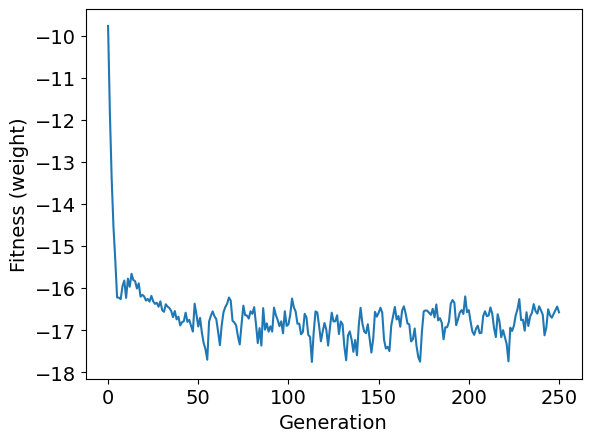

In [258]:
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs_weight)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness (weight)")

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.



You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

[[0.0004262956024743722, -0.00010202113188258292, -0.0017888870770177093], [0.0004262956024743722, -0.00010202113188258292, -0.0017888870770177093], [-1.1446251676462424, -1.1526406939122056, -1.1524836717648839], [0.0004262956024743722, -0.00010202113188258292, -1.1524836717648839], [-1.0806805835902953, -0.6373924407895215, -1.0682141213402117], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.00010202113188258292, -1.1524836717648839], [-1.1446251676462424, -0.0001

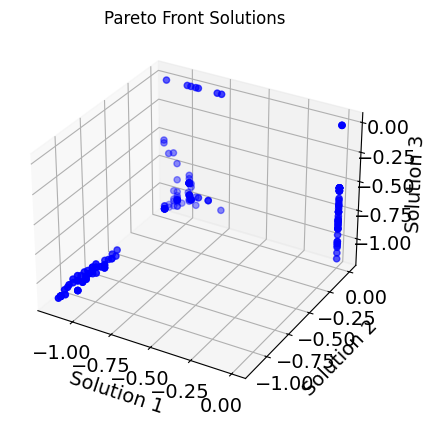

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the Pareto front (non-dominated solutions)
pareto_front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]

print(pareto_front)
# Extract solutions from Pareto front
pareto_front_solutions = np.array([ind for ind in pareto_front])
print(pareto_front_solutions)

# Plot Pareto front solutions
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Extract x, y, and z values from solutions
x = pareto_front_solutions[:, 0]
y = pareto_front_solutions[:, 1]
z = pareto_front_solutions[:, 2]

# Plot
ax.scatter(x, y, z, c="b", marker="o")

# Set labels
ax.set_xlabel("Solution 1")
ax.set_ylabel("Solution 2")
ax.set_zlabel("Solution 3")

plt.title("Pareto Front Solutions")

plt.show()

[(-19.995540425719, 0.008993428064611073), (-19.995540425719, 0.008993428064611073), (-14.444205118851745, -11.624755813088886), (-17.940513648023437, -3.8731059124412037), (-15.578247980545182, -7.921905521991706), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-15.895271856485426, -7.748352785869988), (-18.75438566860653, -0.723194283422107), (-16.628248206216853, -5.200812583054936), (-18.799122871021293, -0.5891460148735906), (-18.82890

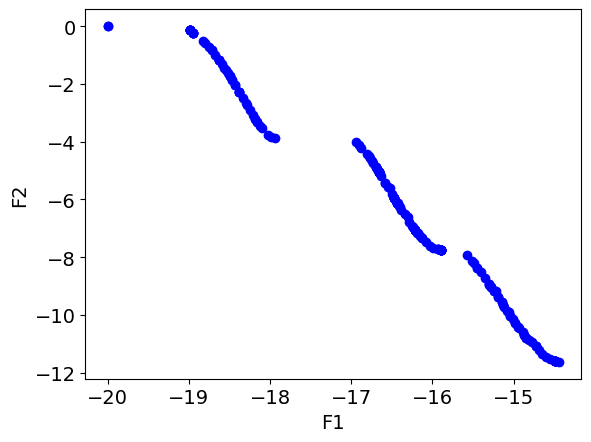

In [260]:
pareto = [benchmarks.kursawe(x) for x in pareto_front]
print(pareto)
x = list(zip(*pareto))[0]
y = list(zip(*pareto))[1]

fig = plt.scatter(x, y, c="b")

plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

# <span style="color:blue">Task 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorithm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm here:
https://deap.readthedocs.io/en/master/api/algo.html

To produce the offspring we can use the DEAP function algorithms.VarOR
https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

evaluate(population)

for g in range(ngen):    

      offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

      evaluate(offspring)

      population = select(population + offspring, mu)

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

```function MuPlusLambdaAlgorithm(Mu, Lambda, generations):
    // Initialization
    population = generateInitialPopulation(Mu)
    
    // Evaluate fitness
    evaluateFitness(population)
    
    // Evolutionary loop
    for gen in range(generations):
        // Offspring generation
        offspring = generateOffspring(population, Lambda)
        
        // Evaluate fitness of offspring
        evaluateFitness(offspring)
        
        // Merge offspring with parents
        combined_population = population + offspring
        
        // Sort combined population by fitness
        sortPopulation(combined_population)
        
        // Select the top Mu individuals
        population = selectTopIndividuals(combined_population, Mu)
        
    return population
```



In [261]:
hof = tools.ParetoFront(similar=pareto_eq)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean, axis=0)
stats.register("std", numpy.std, axis=0)
stats.register("min", numpy.min, axis=0)
stats.register("max", numpy.max, axis=0)
# Creates a population of 100 individuals using the toolbox.population function that was previously registered. This function creates a list of individuals, where each individual is created using the toolbox.individual function.
pop = toolbox.population(n=100)
logbook = tools.Logbook()
# Evaluates the fitness of each individual in the population using the toolbox.evaluate function that was registered earlier. This line uses the map function to apply the toolbox.evaluate function to each individual in the population pop, and then converts the result into a list.
fitnesses = list(map(toolbox.evaluate, pop))

# Iterates through each individual ind in the population pop and its corresponding fitness value fit.
for ind, fit in zip(pop, fitnesses):
    # Assigns the fitness value fit to the fitness.values attribute of the individual ind.
    ind.fitness.values = fit


for gen in range(NGEN):
    offspring = algorithms.varOr(pop, toolbox, LAMBDA, CXPB, MUTPB)

    fitnesses = list(map(toolbox.evaluate, offspring))

    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    combined_pop = pop + offspring

    pop = toolbox.select(combined_pop, popSize)

    pop.sort(key=lambda x: x.fitness.values)

    pop = pop[:MU]

    record = stats.compile(pop)
    logbook.record(gen=gen, **record)
    hof.update(pop)

Text(0, 0.5, 'Fitness (weight)')

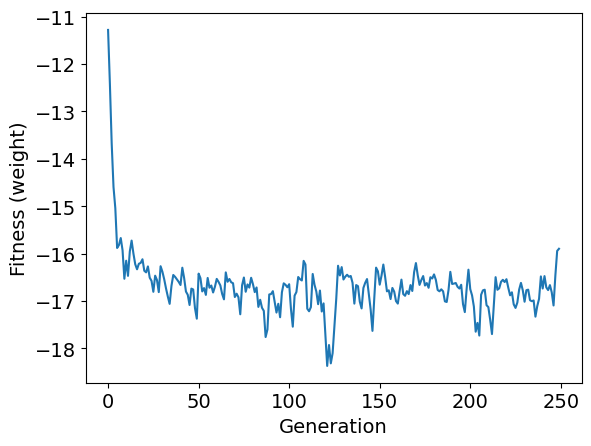

In [262]:
import matplotlib.pyplot as plt

%matplotlib inline

gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
avgs_weight = [item[0] for item in avgs]
avgs_value = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs_weight)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness (weight)")

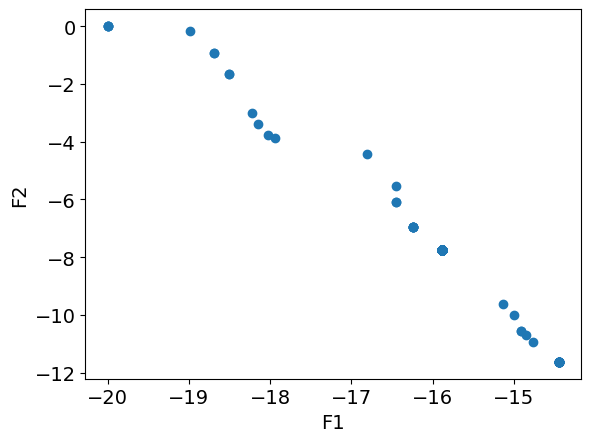

In [263]:
pareto_front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
pareto = [benchmarks.kursawe(x) for x in pareto_front]

fig = plt.scatter(*zip(*pareto))

plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

# <span style="color:blue">Optional Task 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html
And for an example see this:
https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy